In [ ]:
pip install prophet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet



Se carga el archivo 'AirPassengers.csv' y se renombran las columnas adecuadamente y
se muestra la serie temporal original para entender mejor los datos.

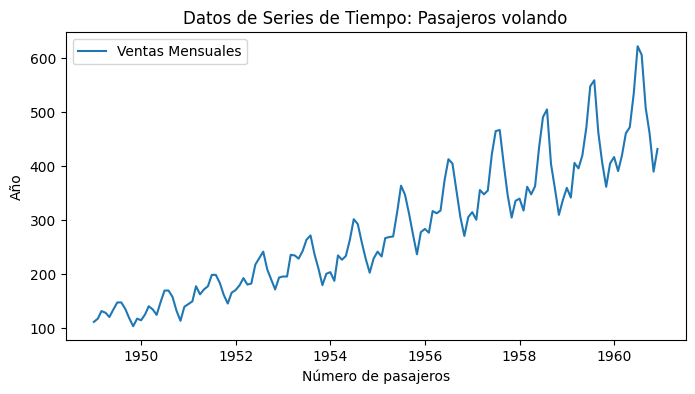

In [29]:
# Cargar datos de ejemplo
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])
#data = data.reset_index()
data.columns = ['ds', 'y']

# Visualizar datos
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Ventas Mensuales')
plt.title('Datos de Series de Tiempo: Pasajeros volando')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.legend()
plt.show()

 La columna ds se convierte a tipo datetime para permitir filtrar por año.

In [35]:
data['ds'] = pd.to_datetime(data['ds'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [49]:
print(data)

            ds    y
0   1949-01-01  112
1   1949-02-01  118
2   1949-03-01  132
3   1949-04-01  129
4   1949-05-01  121
..         ...  ...
139 1960-08-01  606
140 1960-09-01  508
141 1960-10-01  461
142 1960-11-01  390
143 1960-12-01  432

[144 rows x 2 columns]


Se crea un modelo Prophet utilizando los datos filtrados y se generan pronósticos para 12 períodos adicionales.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpri67dm5x/geyzr84x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpri67dm5x/l3igg0mu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61765', 'data', 'file=/tmp/tmpri67dm5x/geyzr84x.json', 'init=/tmp/tmpri67dm5x/l3igg0mu.json', 'output', 'file=/tmp/tmpri67dm5x/prophet_modelkrejmi9e/prophet_model-20240717001530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


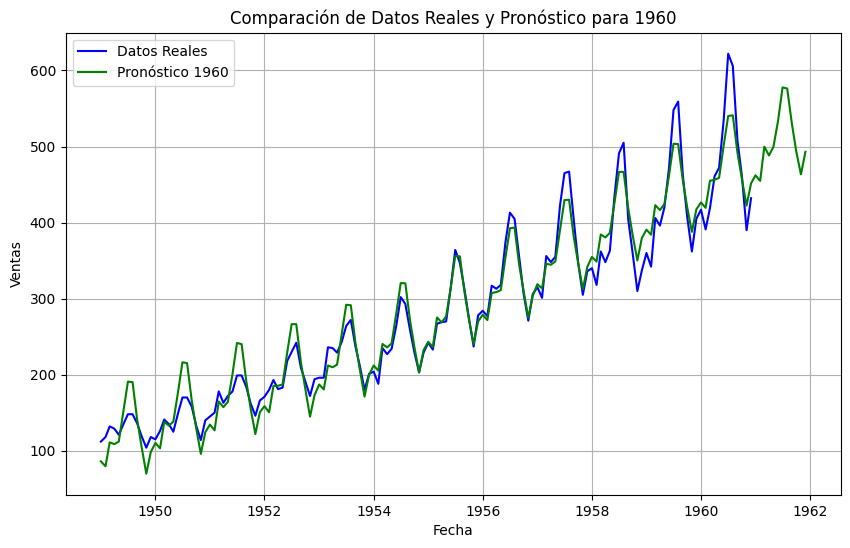

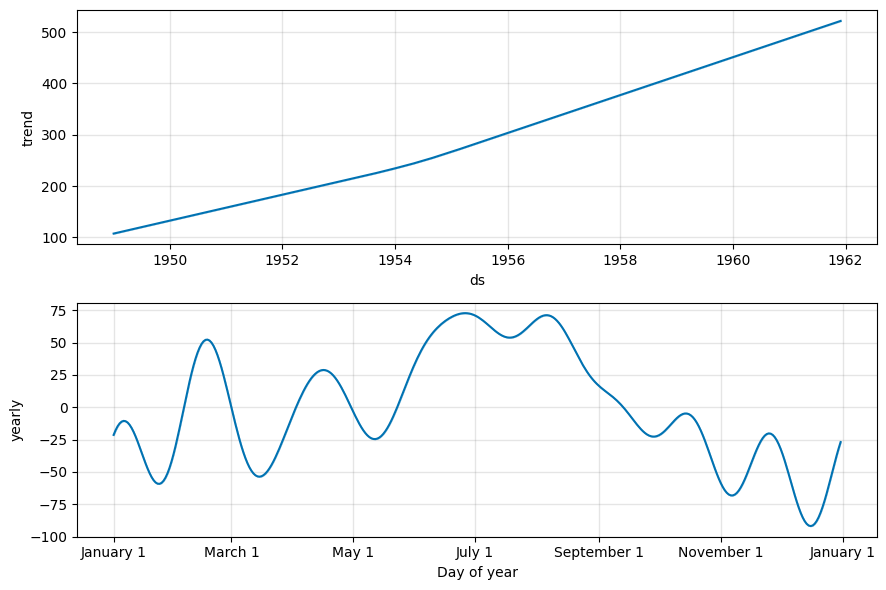

In [50]:
# Construir el modelo Prophet
model = Prophet()
model.fit(data)


# Realizar pronósticos
future = model.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model.predict(future)


plt.figure(figsize=(10, 6))

plt.plot(data['ds'], data['y'], label='Datos Reales', color='blue')


# Graficar pronósticos para el año 1960
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Pronóstico 1960', color='green')

# Configuración del gráfico
plt.title('Comparación de Datos Reales y Pronóstico para 1960')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()


# Visualizar componentes del modelo
fig2 = model.plot_components(forecast_prophet)
plt.show()


Se filtran los datos para crear un nuevo modelo, usando hasta el año de 1959

In [51]:
# Construir el modelo Prophet con datos hasta 1959
filtered_df = data[data['ds'].dt.year <= 1959]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpri67dm5x/vfdvrdr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpri67dm5x/re68isz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5389', 'data', 'file=/tmp/tmpri67dm5x/vfdvrdr9.json', 'init=/tmp/tmpri67dm5x/re68isz8.json', 'output', 'file=/tmp/tmpri67dm5x/prophet_model7ntxm9nl/prophet_model-20240717002045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


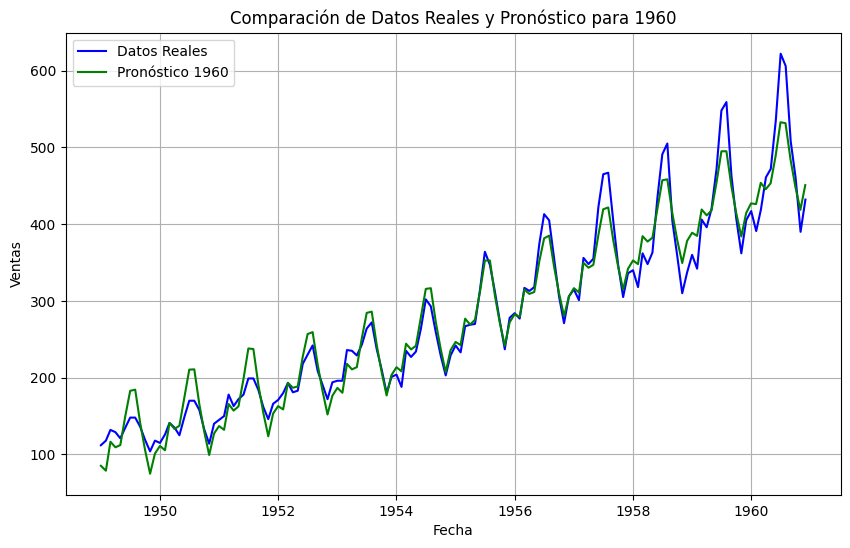

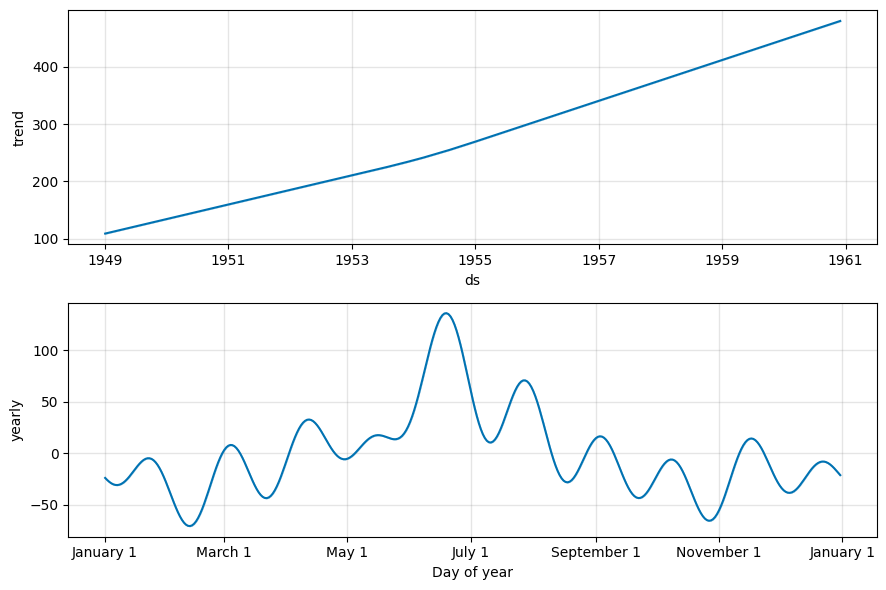

In [54]:
# Construir el modelo Prophet
model = Prophet()
model.fit(filtered_df)


# Realizar pronósticos
future = model.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model.predict(future)

plt.figure(figsize=(10, 6))

plt.plot(data['ds'], data['y'], label='Datos Reales', color='blue')

# Graficar pronósticos para el año 1960
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Pronóstico 1960', color='green')

# Configuración del gráfico
plt.title('Comparación de Datos Reales y Pronóstico para 1960')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

# Visualizar componentes del modelo
fig2 = model.plot_components(forecast_prophet)
plt.show()